# Single Qubit Excitation Value

In [1]:
import tequila as tq
import numpy

As a first example we are gonna create a simple expectation value with a single Pauli matrix as Hamiltonian and a parametrized wavefunction that is generated by a Pauli-Y rotation.
$$ E = \langle \Psi \rvert H \lvert \Psi \rangle $$  

$$ H = \sigma_x $$  

$$ \lvert\Psi(a)\rangle = U(a)\lvert 0 \rangle $$

$$ U(a) = e^{-i\frac{a}{2}\sigma_y} $$

we can use the notation

$$
E = \langle H \rangle_{U(a)}
$$

In [8]:
H = tq.paulis.X(0)
U = tq.gates.Rp(angle="a", paulistring="Y(0)")
E = tq.ExpectationValue(H=H, U=U)

In [9]:
print(E)

Objective with 1 unique expectation values
total measurements = 1
variables          = [a]
types              = not compiled


We can `compile` the abstract expectation value into a callable structure, which we can evaluate by passing it a dictionary with the variable names and values.

In [10]:
f = tq.compile(E)

In [11]:
print(f)

Objective with 1 unique expectation values
total measurements = 1
variables          = [a]
types              = [<class 'tequila.simulators.simulator_qulacs.BackendExpectationValueQulacs'>]


In [12]:
evaluated = f({"a":1.0})
print("f(1.0)={}".format(evaluated))

f(1.0)=0.8414709848078965


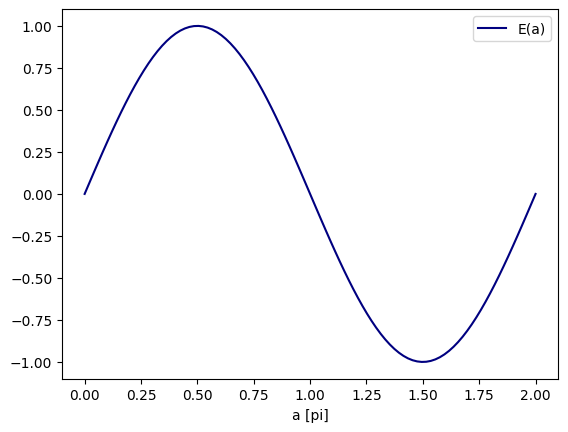

In [30]:
from matplotlib import pyplot as plt

# evaluate at different values of the angle "a"
# using units if pi
n=100
step=2/(n-1)
value = 0.0
y = []
x = []
for k in range(n):
    value = k*step
    x.append(value)
    y.append(f({"a":value*numpy.pi}))

plt.plot(x,y,label="E(a)", color="navy")
plt.xlabel("a [pi]")
plt.legend()
plt.show()

## Exercise

Compute the gradient if the expectation value with respect to the variable a and plot it.

In [16]:
# hint
dE = tq.grad(E,"a")
print(dE)

Objective with 2 unique expectation values
total measurements = 2
variables          = [a]
types              = not compiled


## Sum of expectation values

We can realize any type of function of expectation values (e.g. a sum of two expectation values). Here is for example

$$ F = 1.5*E_0 + 0.5*E_1 $$

with $E_0$ being the expectation value defined above, and $E_1$ a different one 

$$
E_0 = \langle \sigma_x \rangle_{U(a)}
$$

$$
E_1 = \langle \sigma_z \rangle_{U(a)}
$$

In this case, we use the same circuit with the same variable for both expectation values, but we could of course use different circuits.

In [19]:
E0 = E

H1 = tq.paulis.Z(0)
E1 = tq.ExpectationValue(H=H1, U=U)

In [46]:
F = 1.5*E0 + 0.5*E1
print(F)
ff = tq.compile(F)

Objective with 2 unique expectation values
total measurements = 2
variables          = [a]
types              = not compiled


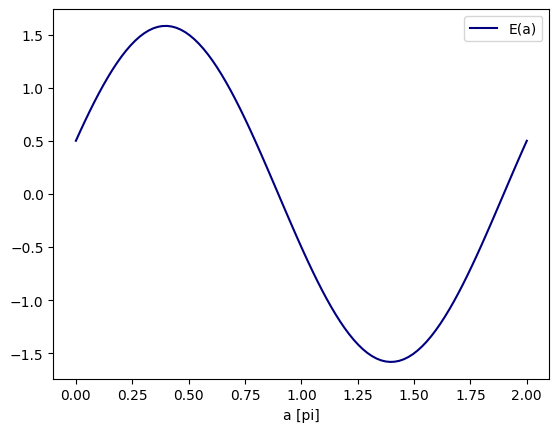

In [45]:
from matplotlib import pyplot as plt

# evaluate at different values of the angle "a"
# using units if pi
n=100
step=2/(n-1)
value = 0.0
y = []
x = []
for k in range(n):
    value = k*step
    x.append(value)
    y.append(ff({"a":value*numpy.pi}))

plt.plot(x,y,label="E(a)", color="navy")
plt.xlabel("a [pi]")
plt.legend()
plt.show()